Feature vector 1:
[0.05355635 0.03390406 0.02201108 0.01345342 0.00986738 0.00922077
 0.0087919  0.00940552 0.01102204 0.01327527 0.01694378 0.02376287
 0.02824624 0.02300739 0.01498087 0.01185339 0.00903273 0.00813539
 0.00746899 0.00816838 0.00867973 0.01343032 0.02285234 0.03407231
 0.05627144 0.52858604]
Feature vector 2:
[0.07205166 0.0409538  0.02436165 0.01416791 0.00951813 0.00759066
 0.0061997  0.00685544 0.00615996 0.00800795 0.00860407 0.01311475
 0.01748634 0.0163537  0.00989568 0.00949826 0.00695479 0.00711376
 0.00677596 0.00834575 0.01021361 0.01327372 0.02155986 0.03755589
 0.05780427 0.55958271]
Feature vector 3:
[0.03813904 0.05445033 0.01112582 0.0042738  0.00246208 0.00361183
 0.00206722 0.00392539 0.00321116 0.00576615 0.00612617 0.02236197
 0.05415999 0.03968945 0.00832114 0.01390728 0.00414025 0.00596358
 0.00301953 0.00757206 0.00207883 0.00405895 0.00969735 0.04805705
 0.04457877 0.5972348 ]
Feature vector 4:
[0.04029583 0.02585    0.02311667 0.0164625  0.01248

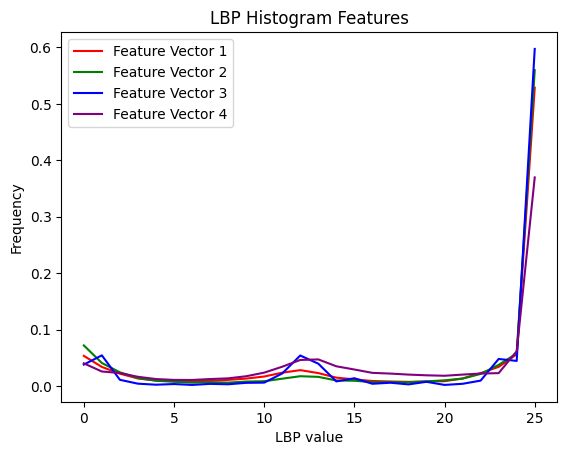

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

def extract_lbp_features(image_path, radius=3, n_points=8*3):
    # 이미지 로드 및 전처리
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # LBP 특징 추출
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')

    # LBP 히스토그램 계산
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # 히스토그램 정규화
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    
    return hist

# 예제 이미지 경로
image_path1 = 'stone.png'
image_path2 = 'stone2.png'
image_path3 = 'wood.png'
image_path4 = 'water.jpeg'

# 네 개의 특징 벡터 추출
feature_vector1 = extract_lbp_features(image_path1)
feature_vector2 = extract_lbp_features(image_path2)
feature_vector3 = extract_lbp_features(image_path3)
feature_vector4 = extract_lbp_features(image_path4)

# 특징 벡터 출력
print("Feature vector 1:")
print(feature_vector1)
print("Feature vector 2:")
print(feature_vector2)
print("Feature vector 3:")
print(feature_vector3)
print("Feature vector 4:")
print(feature_vector4)

# 네 개의 특징 벡터 플롯
plt.figure()
plt.plot(feature_vector1, color='red', label='Feature Vector 1')
plt.plot(feature_vector2, color='green', label='Feature Vector 2')
plt.plot(feature_vector3, color='blue', label='Feature Vector 3')
plt.plot(feature_vector4, color='purple', label='Feature Vector 4')
plt.title('LBP Histogram Features')
plt.xlabel('LBP value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [10]:
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# LBP 파라미터 설정
radius = 3
n_points = 8 * radius

# 웹캠 설정
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# 실시간 영상 처리 루프
while True:
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to capture image.")
        break
    
    # 이미지 전처리
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # LBP 특징 추출
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    
    # LBP 히스토그램 계산
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    
    # 히스토그램 정규화
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    
    # 결과 시각화
    cv2.imshow('Original Image', gray)
    cv2.imshow('LBP Image', lbp.astype('uint8'))

    # 히스토그램 시각화
    hist_img = np.zeros((300, 512, 3), dtype=np.uint8)
    hist_height = hist_img.shape[0]
    hist_width = hist_img.shape[1]
    bin_width = int(hist_width / (n_points + 2))

    for i in range(n_points + 2):
        cv2.rectangle(hist_img, 
                      (i * bin_width, hist_height), 
                      ((i + 1) * bin_width, hist_height - int(hist[i] * hist_height)), 
                      (255, 255, 255), 
                      -1)

    cv2.imshow('LBP Histogram', hist_img)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 리소스 해제
cap.release()
cv2.destroyAllWindows()
